# **FINDING CORRELATION**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

#### LOAD DATASET

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

---

#### Analyze and Visualize Compensation Distribution

Let's analyze distribution of `ConvertedCompYearly`

In [11]:
# Basic summary
print("--- Basic Summary ---")
print(f"Total of rows: {len(df)}")
print(f"Number of missing values: {df['ConvertedCompYearly'].isna().sum()}")
print(f"Data type: {df['ConvertedCompYearly'].dtypes}")
print("-" * 60)

--- Basic Summary ---
Total of rows: 65437
Number of missing values: 42002
Data type: float64
------------------------------------------------------------


Since the missing values are way too high, it'll be better to create a seperate dataframe and drop all missing values.

Number of missing values: 0
--- Statistical Summary ---
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


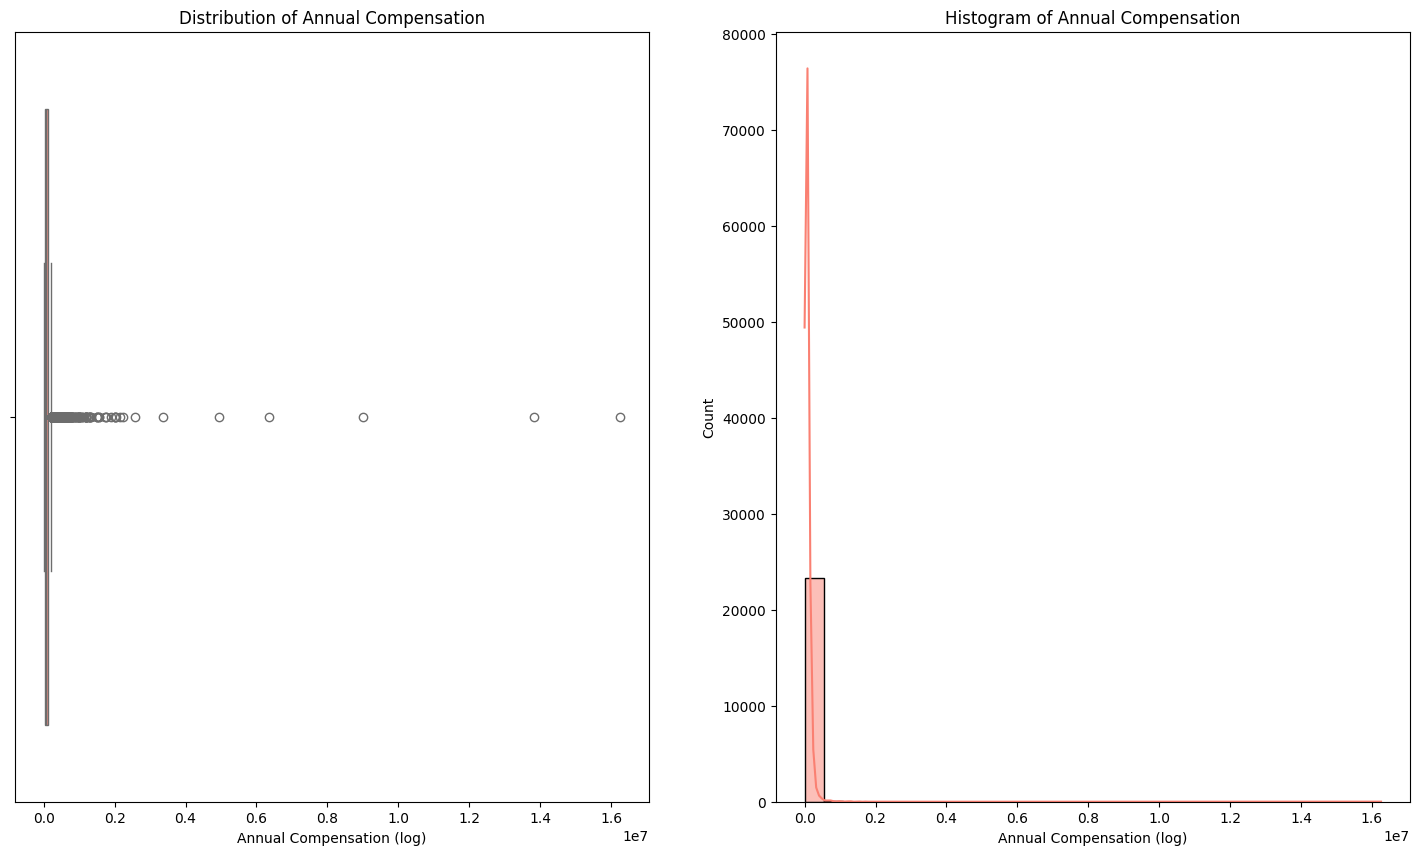

In [77]:
# Create a seperate compensation dataframe
new_comp = df.dropna(subset=['ConvertedCompYearly']).copy()

# Verify
print(f"Number of missing values: {new_comp['ConvertedCompYearly'].isna().sum()}")
print("--- Statistical Summary ---")
print(new_comp['ConvertedCompYearly'].describe())

# --- Visualize ---
# Create figure
fig, axes = plt.subplots(1, 2, figsize=(18,10))

# Box Plot
sns.boxplot(data=new_comp, x='ConvertedCompYearly', color='salmon', ax=axes[0])
# Add title and labels
axes[0].set_title("Distribution of Annual Compensation")
axes[0].set_xlabel("Annual Compensation (log)")

# Histogram
sns.histplot(data=new_comp, x='ConvertedCompYearly', bins=30, kde=True, color='salmon', ax=axes[1])
# Add title and labels
axes[1].set_title("Histogram of Annual Compensation")
axes[1].set_xlabel("Annual Compensation (log)")


plt.show()

`Standard deviation` is bigger than `Mean`, that means the data are highly spread out. `Box plot` and `Histogram` also shows a massive amount of outliers.

#### REMOVING OUTLIERS FROM THE DATASET

In [92]:
# Size before filtering
print(f"Compensation data size: {len(new_comp)}")

# IQR will be used to filter outliers
Q1 = new_comp['ConvertedCompYearly'].quantile(0.25)
Q3 = new_comp['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Clean Outliers using IQR filter
comp_df = new_comp[(new_comp['ConvertedCompYearly'] >= Q1 - 1.5 * IQR) &
                   (new_comp['ConvertedCompYearly'] <= Q3 + 1.5 * IQR)].copy()

comp_df = comp_df[comp_df['ConvertedCompYearly'] > 1000] # Filter out annual salary under $1000 cause that's unrealistic (noise)

# verify
print(f"Compensation data size after filter IQR: {len(comp_df)}")

Compensation data size: 23435
Compensation data size after filter IQR: 21910


---

### Calculate `Median` Compensation for Full-Time Employees

In [94]:
median_empft = comp_df.loc[comp_df['Employment'].str.contains("Employed, full-time", case=False, na=False), 'ConvertedCompYearly'].median()

print(f"Median Annual Compensation for full-time employee: ${median_empft:,.1f}")

Median Annual Compensation for full-time employee: $65,907.0


---

#### Analyzing Compensation Range and Distribution by Country

In [95]:
# let's get top 4 country based on number of respondents
top10 = list(comp_df['Country'].value_counts().head(10).index)

result_list = []

for country in top10:
    # Filter Data
    country_data = comp_df[comp_df['Country'] == country]
    
    # Calculate the stats
    min_val = country_data['ConvertedCompYearly'].min()
    max_val = country_data['ConvertedCompYearly'].max()
    median_val = country_data['ConvertedCompYearly'].median()
    
    # Append to list as dict
    result_list.append({
        'Country' : country,
        'Min_Compensation' : min_val,
        'Max_Compensation' : max_val,
        'Median_Salary' : median_val,
        'Range (Max-Min)' : max_val - min_val
    })

range_df = pd.DataFrame(result_list)

range_df = range_df.sort_values('Median_Salary', ascending=False)

range_df

,Country,Min_Compensation,Max_Compensation,Median_Salary,Range (Max-Min)
0,United States of America,2991.0,220207.0,130000.0,217216.0
6,Canada,5815.0,218079.0,83597.0,212264.0
2,United Kingdom of Great Britain and Northern I...,2930.0,216559.0,82802.0,213629.0
1,Germany,1074.0,214812.0,71962.0,213738.0
9,Netherlands,1933.0,214812.0,69814.0,212879.0
8,Poland,1411.0,214812.0,56051.0,213401.0
5,France,1289.0,214812.0,53703.0,213523.0
3,Ukraine,1007.0,190000.0,33435.0,188993.0
7,Brazil,1212.0,205136.0,24243.0,203924.0
4,India,1017.0,220128.0,17945.0,219111.0


There's still many outliers in the data that affect the differences between each country, i'll handle them later.

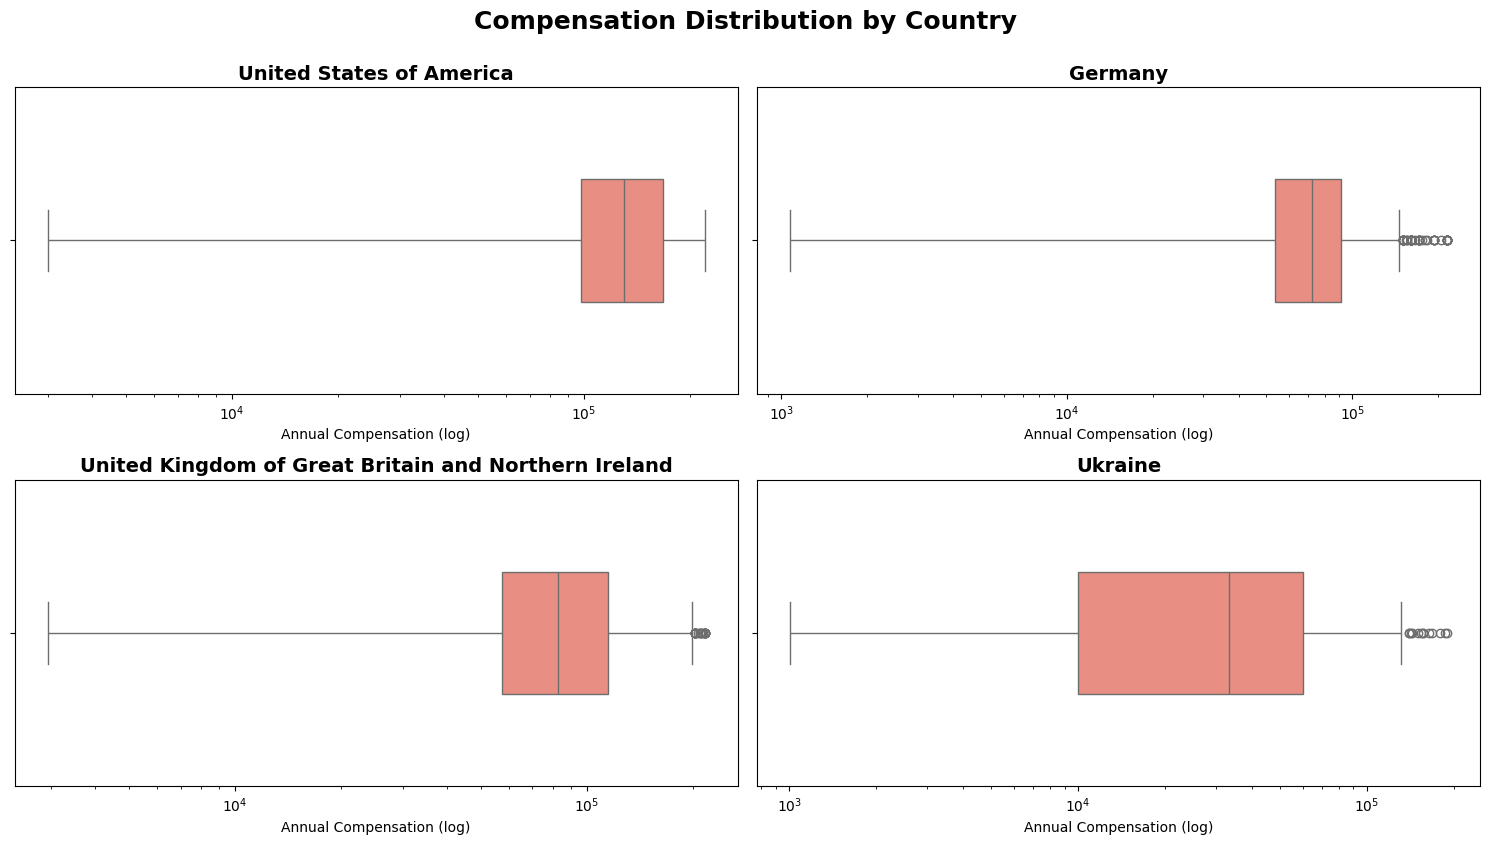

In [96]:
# let's get top 4 country based on number of respondents
top4 = list(comp_df['Country'].value_counts().head(4).index)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15,8))

# Flatten the axes array
# (This turns the 2x2 grid [[ax1, ax2], [ax3, ax4]] into a simple list [ax1, ax2, ax3, ax4])
axes = axes.flatten()

# Loop through countries and axes simultaneously
for i, country in enumerate(top4):
    # Filter data
    country_data = comp_df[comp_df['Country'] == country]

    # Plot on spesific axes
    sns.boxplot(x=country_data['ConvertedCompYearly'], ax=axes[i], color='salmon', width=0.4)

    # Styling the plot
    axes[i].set_title(f"{country}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Annual Compensation (log)")

    # Set log scale
    axes[i].set_xscale('log')

plt.tight_layout()
plt.suptitle("Compensation Distribution by Country", fontsize=18, fontweight='bold', y=1.05)
plt.show()

---

#### FINDING CORRELATIONS BETWEEN KEY VARIABLES

--- CORRELATION MATRIX ---
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.407711       -0.054417
WorkExp                         0.407711  1.000000       -0.032259
JobSatPoints_1                 -0.054417 -0.032259        1.000000


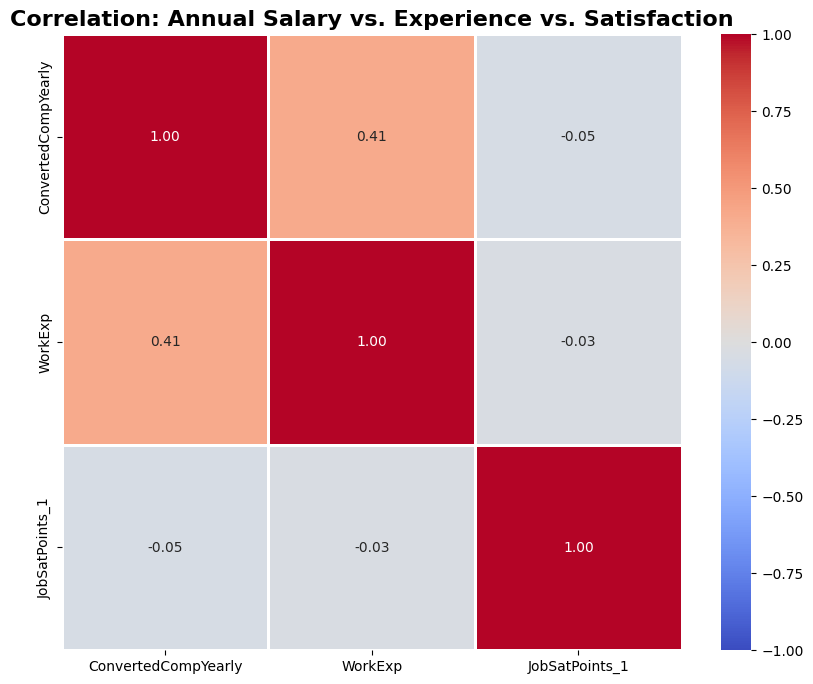

In [105]:
# Create seperate dataset for heatmap
sej_df = comp_df.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']).copy()

# Correlation matrix
corr_matrix = sej_df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()

print("--- CORRELATION MATRIX ---")
print(corr_matrix)


# --- HEATMAP ---
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=1,
            linecolor='white')

plt.title("Correlation: Annual Salary vs. Experience vs. Satisfaction", fontsize=16, fontweight='bold')

plt.show()

Heatmap shows that while experience is a moderate driver of higher salaries (Correlation: 0.41), neither high salaries nor years of experience have any meaningful impact on job satisfaction. If we want to improve employee happiness, just paying them more or hiring more senior staff won't work—we need to look at other factors.

---

#### SCATTER PLOT FOR CORRELATIONS

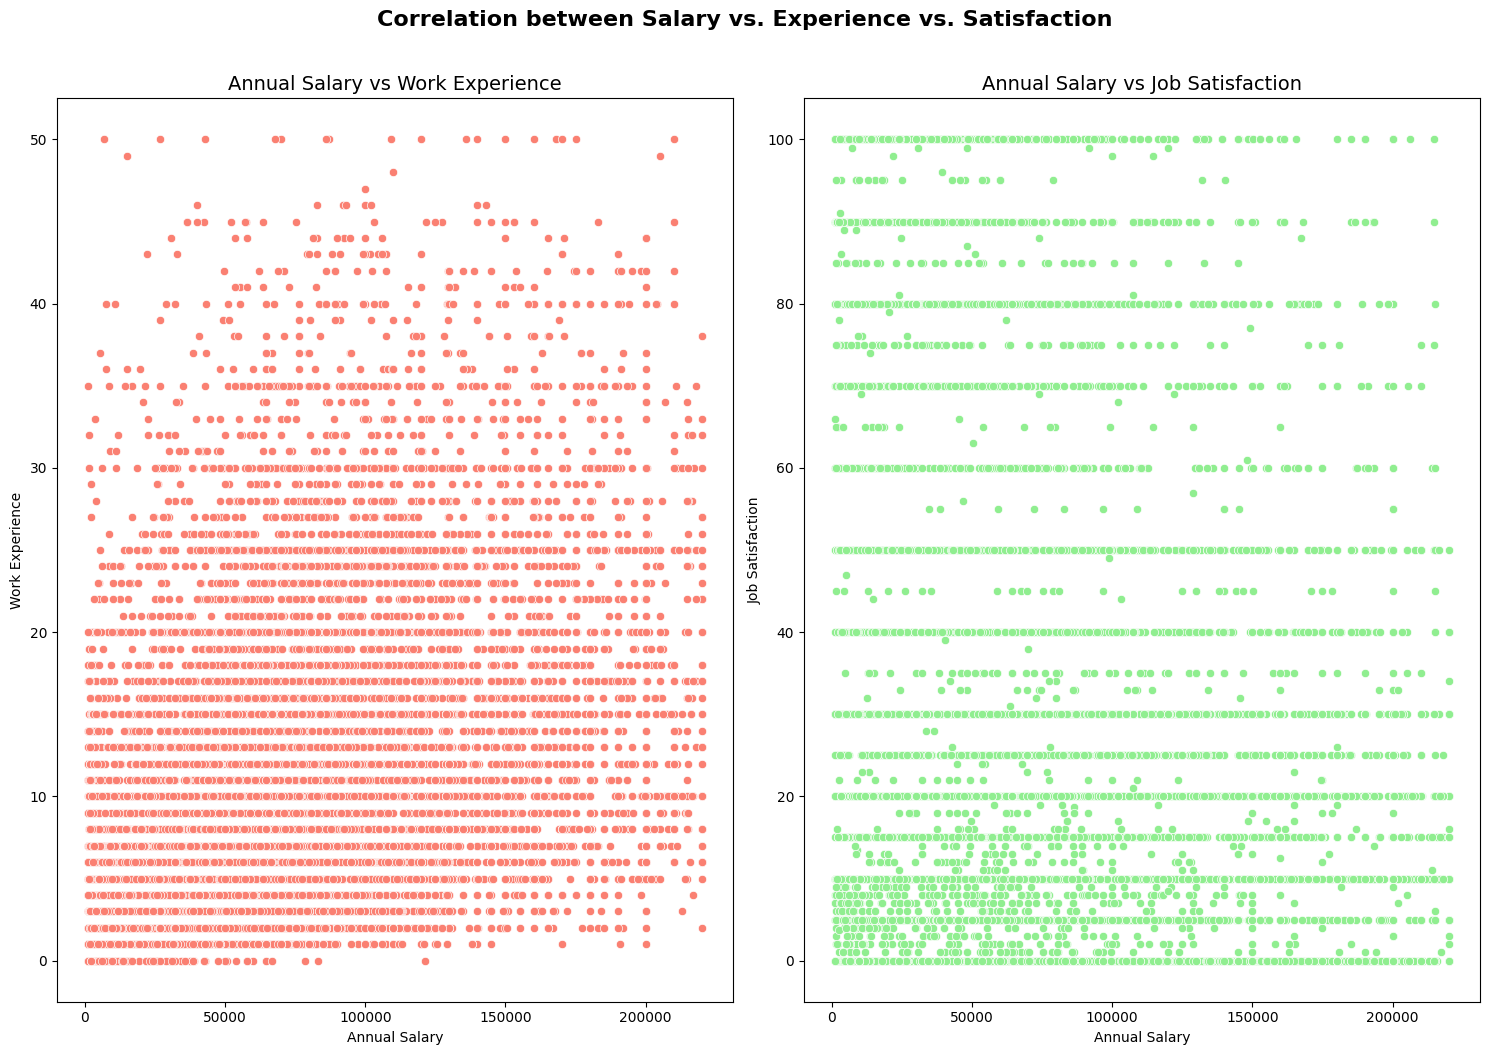

In [108]:
# --- SCATTER ---
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Annual Salary vs Work Experience
sns.scatterplot(data=sej_df, x='ConvertedCompYearly', y='WorkExp', color='salmon', ax=axes[0])
axes[0].set_title("Annual Salary vs Work Experience", fontsize=14)
axes[0].set_xlabel("Annual Salary")
axes[0].set_ylabel("Work Experience")


sns.scatterplot(data=sej_df, x='ConvertedCompYearly', y='JobSatPoints_1', color='lightgreen', ax=axes[1])
axes[1].set_title("Annual Salary vs Job Satisfaction", fontsize=14)
axes[1].set_xlabel("Annual Salary")
axes[1].set_ylabel("Job Satisfaction")

plt.tight_layout()
plt.suptitle("Correlation between Salary vs. Experience vs. Satisfaction", fontsize=16, fontweight='bold', y=1.05)

plt.show()

**Insight:**

Don't assume high pay equals a happy employee. The data shows happiness is completely random relative to income. Focus on culture and role fit instead.

---

#### **SUMMARY**

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.